# Analysis

Please note that the pandas documentation was used as a resource throughout this analysis:

https://pandas.pydata.org/docs/

_Importing Libraries:_

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

*_Reading in the data:_*

Let's read in the cleaned data and take a look at the first 10 rows to get an idea of what it looks like inside.

In [3]:
# Using pd.read_csv() to read in the cleaned market data set, then showing the first 10 rows using .head() to get an idea of what's inside
market_data_df = pd.read_csv("data/market_data_cleaned.csv")

market_data_df.head(10)

,Date,SP500_Close,SP500_High,SP500_Low,SP500_Open,SP500_Volume,Nasdaq_Close,Nasdaq_High,Nasdaq_Low,Nasdaq_Open,...,DowJones_High,DowJones_Low,DowJones_Open,DowJones_Volume,10Y_Treasury_Yield,Gold_Close,Gold_High,Gold_Low,Gold_Open,Gold_Volume
0,2010-01-12,1136.219971,1143.810059,1131.770020,1143.810059,4.716160e+09,2282.310059,2298.850098,2272.699951,2297.280029,...,10663.080078,10568.839844,10662.860352,256050000.0,3.74,1128.900024,1157.199951,1127.199951,1128.900024,51.0
1,2010-01-13,1145.680054,1148.400024,1133.180054,1137.310059,4.170360e+09,2307.899902,2313.030029,2274.120117,2289.459961,...,10709.259766,10614.490234,10628.089844,202810000.0,3.80,1136.400024,1136.400024,1121.000000,1136.400024,58.0
2,2010-01-14,1148.459961,1150.410034,1143.800049,1145.680054,3.915200e+09,2316.739990,2322.560059,2303.290039,2303.310059,...,10723.769531,10666.860352,10680.160156,201320000.0,3.76,1142.599976,1145.900024,1132.800049,1137.000000,81.0
3,2010-01-15,1136.030029,1147.770020,1131.390015,1147.719971,4.758730e+09,2287.989990,2322.540039,2279.199951,2316.979980,...,10709.940430,10561.059570,10706.990234,362930000.0,3.70,1130.099976,1133.400024,1127.199951,1132.800049,50.0
4,2010-01-19,1150.229980,1150.449951,1135.770020,1136.030029,4.724830e+09,2320.399902,2320.399902,2290.679932,2291.020020,...,10729.889648,10591.969727,10608.370117,192150000.0,3.73,1139.699951,1139.699951,1130.500000,1139.699951,22.0
5,2010-01-20,1138.040039,1147.949951,1129.250000,1147.949951,4.810560e+09,2291.250000,2304.469971,2268.679932,2304.310059,...,10719.919922,10517.299805,10719.690430,203270000.0,3.68,1112.300049,1133.000000,1109.800049,1123.300049,28.0
6,2010-01-21,1116.479980,1141.579956,1114.839966,1138.680054,6.874290e+09,2265.699951,2308.979980,2259.820068,2298.229980,...,10614.940430,10374.690430,10603.910156,304290000.0,3.62,1102.699951,1107.500000,1090.199951,1102.699951,99.0
7,2010-01-22,1091.760010,1115.489990,1090.180054,1115.489990,6.208650e+09,2205.290039,2262.270020,2200.370117,2255.760010,...,10389.580078,10157.639648,10389.580078,323620000.0,3.62,1089.199951,1095.400024,1083.000000,1089.199951,58.0
8,2010-01-25,1096.780029,1102.969971,1092.400024,1092.400024,4.481390e+09,2210.800049,2223.219971,2201.169922,2220.290039,...,10256.870117,10171.769531,10175.099609,215330000.0,3.66,1095.199951,1095.199951,1095.199951,1095.199951,8.0
9,2010-01-26,1092.170044,1103.689941,1089.859985,1095.800049,4.731910e+09,2203.729980,2227.889893,2195.439941,2203.439941,...,10285.129883,10155.599609,10195.349609,217300000.0,3.65,1097.900024,1097.900024,1097.900024,1097.900024,4.0


In [5]:
# Using pd.read_csv() to read in the cleaned meeting date data set, then showing the first 10 rows using .head() to get an idea of what's inside
meetings_df = pd.read_csv("data/meeting_dates.csv")

meetings_df.head(10)

,meeting_start,meeting_end
0,2010-01-26,2010-01-27
1,2010-03-16,2010-03-16
2,2010-04-27,2010-04-28
3,2010-06-22,2010-06-23
4,2010-08-10,2010-08-10
5,2010-09-21,2010-09-21
6,2010-11-02,2010-11-03
7,2010-12-14,2010-12-14
8,2011-01-25,2011-01-26
9,2011-03-15,2011-03-15


## Part I: Descriptive Analysis

_Objective:_

Identify overarching trends and variations in price movements, volatility, and trading activity in the days surrounding Federal Reserve meetings.

_Approach:_
 - Calculate daily percentage changes in asset prices to observe trends.
 - Compute key statistical measures (mean, median, standard deviation, and range) for:
    1. Pre-meeting window: 15 days before the meeting.
    2. Meeting day: The day of the meeting.
    3. Post-meeting window: 15 days after the meeting.   
 - Compare these measures across different asset classes (equities, bonds, gold).


First, let's create columns for daily percentage change in asset prices (for the market data DataFrame):

In [7]:
# Go through the column names
for column in market_data_df:

    # If "_Close" is in the column name, save the asset name
    if "_Close" in column:
        asset_name = column[:-6]

        # Create a new percentage change column using the asset name and the close and open values of the asset for the date
        close_values = market_data_df[asset_name + "_Close"]
        open_values = market_data_df[asset_name + "_Open"]
        percantage_change_column_name = asset_name + "_Daily_%_Change"
        market_data_df[percantage_change_column_name] = (close_values - open_values) / open_values * 100

# Show the DataFrame with the new columns with .head()
market_data_df.head()

,Date,SP500_Close,SP500_High,SP500_Low,SP500_Open,SP500_Volume,Nasdaq_Close,Nasdaq_High,Nasdaq_Low,Nasdaq_Open,...,10Y_Treasury_Yield,Gold_Close,Gold_High,Gold_Low,Gold_Open,Gold_Volume,SP500_Daily_%_Change,Nasdaq_Daily_%_Change,DowJones_Daily_%_Change,Gold_Daily_%_Change
0,2010-01-12,1136.219971,1143.810059,1131.770020,1143.810059,4.716160e+09,2282.310059,2298.850098,2272.699951,2297.280029,...,3.74,1128.900024,1157.199951,1127.199951,1128.900024,51.0,-0.663579,-0.651639,-0.333875,0.000000
1,2010-01-13,1145.680054,1148.400024,1133.180054,1137.310059,4.170360e+09,2307.899902,2313.030029,2274.120117,2289.459961,...,3.80,1136.400024,1136.400024,1121.000000,1136.400024,58.0,0.735947,0.805428,0.495665,0.000000
2,2010-01-14,1148.459961,1150.410034,1143.800049,1145.680054,3.915200e+09,2316.739990,2322.560059,2303.290039,2303.310059,...,3.76,1142.599976,1145.900024,1132.800049,1137.000000,81.0,0.242643,0.583071,0.284543,0.492522
3,2010-01-15,1136.030029,1147.770020,1131.390015,1147.719971,4.758730e+09,2287.989990,2322.540039,2279.199951,2316.979980,...,3.70,1130.099976,1133.400024,1127.199951,1132.800049,50.0,-1.018536,-1.251197,-0.909124,-0.238354
4,2010-01-19,1150.229980,1150.449951,1135.770020,1136.030029,4.724830e+09,2320.399902,2320.399902,2290.679932,2291.020020,...,3.73,1139.699951,1139.699951,1130.500000,1139.699951,22.0,1.249963,1.282393,1.103464,0.000000


Next, let's focus on just categorizing the data as being in before, during or after meeting windows:

In [8]:
# Changing date columns in DataFrame to pandas datetime
market_data_df["Date"] = pd.to_datetime(market_data_df["Date"])
meetings_df["meeting_start"] = pd.to_datetime(meetings_df["meeting_start"])
meetings_df["meeting_end"] = pd.to_datetime(meetings_df["meeting_end"])

# Creating empty master lists of of pre, post, and during meeting window dates
pre_meeting_window_dates = []
meeting_dates = []
post_meeting_window_dates = []

# Going through the DataFrame of meetings
for meetings_df_index in range(len(meetings_df)):    
    meeting = meetings_df.iloc[meetings_df_index]

    # Getting the date range of each window.
    pre_meeting_window = pd.date_range(start = meeting["meeting_start"] - pd.Timedelta("15 days"), end = meeting["meeting_start"] - pd.Timedelta("1 day"))
    meeting_window = pd.date_range(start = meeting["meeting_start"], end = meeting["meeting_end"])
    post_meeting_window = pd.date_range(start = meeting["meeting_end"] + pd.Timedelta("1 days"), end = meeting["meeting_end"] + pd.Timedelta("15 day"))
    
    # Appending each date to the master list of pre, post, and during meeting window dates.
    for date in pre_meeting_window:
        pre_meeting_window_dates.append(date)
    for date in meeting_window:
        meeting_dates.append(date)
    for date in post_meeting_window:
        post_meeting_window_dates.append(date)
        
# Selecting new DataFrame for pre, post, and during meeting window dates.
# Note that.copy() is being used because of a warning that ocurred regarding chained indexing while trying to add a column in a future operation.
market_data_pre_meetings_df = market_data_df.copy()[market_data_df["Date"].isin(pre_meeting_window_dates)]
market_data_post_meetings_df = market_data_df.copy()[market_data_df["Date"].isin(post_meeting_window_dates)]
market_data_during_meetings_df = market_data_df.copy()[market_data_df["Date"].isin(meeting_dates)]

Finally, let's calculate some descriptive statistics:

Let's take a look at mean, median, standard deviation, and range for daily percentage change in asset price accross the different asset classes (bond yield will be in absolute daily terms not daily percentage change terms). 

In [9]:
# Create new DataFrames for percentage change descriptive statistics
pctg_change_means_df = pd.DataFrame()
pctg_change_medians_df = pd.DataFrame()
pctg_change_ranges_df = pd.DataFrame()
pctg_change_stds_df = pd.DataFrame()

# Empty list to save the asset names for the index, as well as lists for mean, median, standard deviation, and range
asset_names = []

means_before = []
means_during = []
means_after = []

medians_before = []
medians_during = []
medians_after  = []

stds_before = []
stds_during = []
stds_after  = []

ranges_before = []
ranges_during = []
ranges_after  = []

# Go through the column names in market_data_df:
for column in market_data_df:

    # Perform operations on just the percentage change columns and bond yield data
    if ("_Daily_%_Change" in column) or (column == "10Y_Treasury_Yield"):

        # Save asset name
        asset_name = column if column == "10Y_Treasury_Yield" else column[:-len("_Daily_%_Change")]
        asset_names.append(asset_name)
        
        # Get mean, median, standard deviation, and range for dates before, during, and after meetings:
        means_before.append(np.mean(market_data_pre_meetings_df[column]))
        means_during.append(np.mean(market_data_during_meetings_df[column]))
        means_after.append(np.mean(market_data_post_meetings_df[column]))

        medians_before.append(np.median(market_data_pre_meetings_df[column]))
        medians_during.append(np.median(market_data_during_meetings_df[column]))
        medians_after.append(np.median(market_data_post_meetings_df[column]))

        stds_before.append(np.std(market_data_pre_meetings_df[column]))
        stds_during.append(np.std(market_data_during_meetings_df[column]))
        stds_after.append(np.std(market_data_post_meetings_df[column]))

        ranges_before.append(np.max(market_data_pre_meetings_df[column]) - np.min(market_data_pre_meetings_df[column]))
        ranges_during.append(np.max(market_data_during_meetings_df[column]) - np.min(market_data_pre_meetings_df[column]))
        ranges_after.append(np.max(market_data_post_meetings_df[column]) - np.min(market_data_pre_meetings_df[column]))
        
    
# Create and show the final DataFrames
pctg_change_means_df["Mean Before"] = means_before
pctg_change_means_df["Mean During"] = means_during
pctg_change_means_df["Mean After"] = means_after
pctg_change_means_df.index = asset_names

pctg_change_medians_df["Median Before"] = medians_before
pctg_change_medians_df["Median During"] = medians_during
pctg_change_medians_df["Median After"] = medians_after
pctg_change_medians_df.index = asset_names

pctg_change_stds_df["Std Before"] = stds_before
pctg_change_stds_df["Std During"] = stds_during
pctg_change_stds_df["Std After"] = stds_after
pctg_change_stds_df.index = asset_names

pctg_change_ranges_df["Range Before"] = ranges_before
pctg_change_ranges_df["Range During"] = ranges_during
pctg_change_ranges_df["Range After"] = ranges_after
pctg_change_ranges_df.index = asset_names

display(pctg_change_means_df)
display(pctg_change_medians_df)
display(pctg_change_stds_df)
display(pctg_change_ranges_df)

,Mean Before,Mean During,Mean After
10Y_Treasury_Yield,2.507262,2.496379,2.494611
SP500,0.015477,0.055214,0.014290
Nasdaq,-0.016611,0.054229,0.015231
DowJones,0.030060,0.044589,0.017218
Gold,-0.018045,0.021693,-0.038147


,Median Before,Median During,Median After
10Y_Treasury_Yield,2.390000,2.335000,2.390000
SP500,0.046441,0.012019,0.045840
Nasdaq,0.070958,0.070569,0.094823
DowJones,0.060320,0.044182,0.059989
Gold,0.000000,0.000000,0.000000


,Std Before,Std During,Std After
10Y_Treasury_Yield,0.938890,0.940292,0.928656
SP500,0.912141,0.960833,0.946458
Nasdaq,0.992277,1.031093,1.018405
DowJones,0.880922,0.875158,0.935509
Gold,0.819150,0.706016,0.923378


,Range Before,Range During,Range After
10Y_Treasury_Yield,4.440000,4.340000,4.270000
SP500,12.080924,11.262042,11.741898
Nasdaq,10.903032,10.318753,11.341017
DowJones,10.972881,9.425054,10.506445
Gold,8.621547,9.086513,10.590750


Interestingly, it seems that mean changes in asset prices sort of "spike" during meetings, except treasury bond yields. Median price increases before, and after across all assets seem to be higher than means (except gold and treasury bond yields), implying some rightward skew of daily price changes before and after meetings. Standard deviations also seem to be higher after meetings vs. before, except treasury bond yields. Ranges do not seem to show exceptional trends except for gold ranges being higher after meetings vs. before.

Now, let's take a look at mean volume before, during and after meetings accross assets (Data not present for bonds):

In [10]:
# Create a new DataFrame
volume_df = pd.DataFrame()

# Initialize empty lists for before, after, and during meetings
means_before = []
means_during  = []
means_after = []

# For all the applicable assets, append the means to the appropriate lists
for asset in asset_names:
    if asset != "10Y_Treasury_Yield":
        column = asset + "_Volume"
        means_before.append(np.mean(market_data_pre_meetings_df[column]))
        means_during.append(np.mean(market_data_during_meetings_df[column]))
        means_after.append(np.mean(market_data_post_meetings_df[column]))

# Create and display the final DataFrame
volume_df["Mean Before"] = means_before
volume_df["Mean During"] = means_during
volume_df["Mean After"] = means_after
asset_names.remove("10Y_Treasury_Yield")
volume_df.index = asset_names
volume_df

,Mean Before,Mean During,Mean After
SP500,4.004404e+09,4.167314e+09,4.050805e+09
Nasdaq,2.983459e+09,3.118168e+09,3.095513e+09
DowJones,2.543337e+08,2.623236e+08,2.562970e+08
Gold,4.693318e+03,1.331755e+04,4.709494e+03


Notably, it looks as if asset volume might be peaking during meetings as well. This is very pronounced for Gold it seems.

## Part II: Comparative Analysis Across Asset Classes:

Let's do some hypothesis testing analysis for some of our observations from above.
Note that the Scipy docs were used during this work: https://docs.scipy.org/doc/scipy/index.html 

First, let's test whether some of those different asset prices spiked during meeting times, as we observed previously (percentage change spikes for S&P 500, Gold, Nasdaq, and Dow Jones). We can use a T-test to check this out:

In [11]:
# Create a new DataFrame to store our results
ttests_price_spike_df = pd.DataFrame()

# Create empty lists for the columns of our DataFrame
ttests_for_before = []
ttests_for_after = []

# for all the applicable assets, calculate tests and append them to the appropriate list
for asset in asset_names:
    column = asset + "_Daily_%_Change"
    ttest_for_before = stats.ttest_ind(market_data_pre_meetings_df[column], 
                                       market_data_during_meetings_df[column],
                                       equal_var = False, 
                                       alternative = "less")
    ttest_for_after = stats.ttest_ind(market_data_post_meetings_df[column], 
                                       market_data_during_meetings_df[column],
                                       equal_var = False, 
                                       alternative = "less")
    ttests_for_before.append(ttest_for_before.pvalue)
    ttests_for_after.append(ttest_for_after.pvalue)

# Create and display the final DataFrame
ttests_price_spike_df["T-test for Before Meeting"] = ttests_for_before
ttests_price_spike_df["T-test for After Meeting"] = ttests_for_after
ttests_price_spike_df.index = asset_names
ttests_price_spike_df 

,T-test for Before Meeting,T-test for After Meeting
SP500,0.281248,0.276991
Nasdaq,0.168611,0.299681
DowJones,0.408892,0.334146
Gold,0.223444,0.133403


While these probabilities are kind of on the lower side, they are still far to high to achieve statistical significance at the 90%+ level and reject the null hypothesis that the means are the same. This is very important to note.

Let's now repeat the process from above, except this time checking our observations about volume:

In [12]:
# Create a new DataFrame to store our results
ttests_volume_spike_df = pd.DataFrame()

# Create empty lists for the columns of our DataFrame
ttests_for_before = []
ttests_for_after = []

# for all the applicable assets, calculate tests and append them to the appropriate list
for asset in asset_names:
    column = asset + "_Volume"
    ttest_for_before = stats.ttest_ind(market_data_pre_meetings_df[column], 
                                       market_data_during_meetings_df[column],
                                       equal_var = False, 
                                       alternative = "less")
    ttest_for_after = stats.ttest_ind(market_data_post_meetings_df[column], 
                                       market_data_during_meetings_df[column],
                                       equal_var = False, 
                                       alternative = "less")
    ttests_for_before.append(ttest_for_before.pvalue)
    ttests_for_after.append(ttest_for_after.pvalue)

# Create and display the final DataFrame
ttests_volume_spike_df["T-test for Before Meeting"] = ttests_for_before
ttests_volume_spike_df["T-test for After Meeting"] = ttests_for_after
ttests_volume_spike_df.index = asset_names
ttests_volume_spike_df 

,T-test for Before Meeting,T-test for After Meeting
SP500,0.007427,0.044425
Nasdaq,0.138924,0.428478
DowJones,0.214910,0.279479
Gold,0.003029,0.002809


Here, we have a lot more statistical significance. Gold before and after meeting and the S&P 500 before meeting seem to be signficiantly significant at the 99% level! S&P 500 after meeting is also statistically significant at the 95% level. This is very strong evidence that both the S&P 500 and Gold both trade at higher volume during meeting days. Nasdaq and DowJones thought not statistically significant still have p-values that tend to be on the lower side.

Now, let's have a look at the correlation between our variables:

In [13]:
# First, getting the column names we are interested in comparing:
columns_of_interest = [i + "_Close" for i in asset_names]
columns_of_interest.append("10Y_Treasury_Yield")

# Now, let's create a correlation matrix on our columns_of_interest
market_data_df[columns_of_interest].corr()

,SP500_Close,Nasdaq_Close,DowJones_Close,Gold_Close,10Y_Treasury_Yield
SP500_Close,1.000000,0.993518,0.992207,0.753691,0.301679
Nasdaq_Close,0.993518,1.000000,0.982320,0.773855,0.252721
DowJones_Close,0.992207,0.982320,1.000000,0.709920,0.273214
Gold_Close,0.753691,0.773855,0.709920,1.000000,0.259461
10Y_Treasury_Yield,0.301679,0.252721,0.273214,0.259461,1.000000


As we can see from the matrix above, the Dow, the Nasdaq, and the S&P 500 are all strongly related to eachother. Gold is also related to these three less strongly. Finally, Treasury Bond Yields, are weakly related to the other four assets.

## Part III: Volatility and Recovery Analysis

_Objective:_

Examine how market volatility evolves and how quickly asset prices stabilize after Federal Reserve meetings.

Before we begin, let's first label all of our before and after meeting data in terms of how many days before and after mettings each day is, so that we can measure trends

In [14]:
# We will create a column in the market data before/after DataFrames reflecting the number of days before/after each meeting the entries are.

# Creating empty dictiomaries that will have dates and them number of days before and after a meeting each date in each window is
days_before = {}
days_after = {}

# Going through the meeting dates again, we want to count how many days pre and post meeting each date is

# Go through each meeting
for i in range(len(meetings_df)):
    meeting = meetings_df.iloc[i]

    # Calulate days before and after meeting windows:
    pre_meeting_window = pd.date_range(start = meeting["meeting_start"] - pd.Timedelta("15 days"), end = meeting["meeting_start"] - pd.Timedelta("1 day"))
    post_meeting_window = pd.date_range(start = meeting["meeting_end"] + pd.Timedelta("1 days"), end = meeting["meeting_end"] + pd.Timedelta("15 day"))

    # Fill the dictionaries with dates and days before/after a meeting
    for date in pre_meeting_window:
        
        # calculate the days before for each date in the range, and add to the days_before dictionary
        value_before = list(pre_meeting_window).index(date) - 15
        days_before[date] = value_before
    
    for date in post_meeting_window:
        
        # calculate the days after for each date in the range, and add to the days_before dictionary
        value_after = list(post_meeting_window).index(date) + 1
        days_after[date] = value_after

# Now, we can add columns categorizing days before/after a meeting using our dictionaries

# Create empty lists for the data
days_before_list = []
days_after_list = []

# Go through each date in market_data_pre_meetings_df and fill the list based on the date.
for i in range(len(market_data_pre_meetings_df)):
    date = market_data_pre_meetings_df.iloc[i]["Date"]
    days_before_list.append(days_before[date])

# Go through each date in market_data_pre_meetings_df and fill the list based on the date.
for i in range(len(market_data_post_meetings_df)):
    date = market_data_post_meetings_df.iloc[i]["Date"]
    days_after_list.append(days_after[date])

# Create the new columns (both called "days after" since days before are represented as negative). We will also add a column for the days of meeting 
# DataFrame (where all values will be 0)
market_data_pre_meetings_df["Days After Meeting"] = days_before_list
market_data_post_meetings_df["Days After Meeting"] = days_after_list
market_data_during_meetings_df["Days After Meeting"] = 0

# Finally, we will concatenate everything together and show what we've done by showing samples from the date and days after meeting colums:
market_data_with_days_after_column_df = pd.concat([market_data_pre_meetings_df, market_data_during_meetings_df, market_data_post_meetings_df])

# Sort by dates before showing the first 12 rows
market_data_with_days_after_column_df = market_data_with_days_after_column_df.sort_values("Date")
market_data_with_days_after_column_df[["Date", "Days After Meeting"]].head(12)

,Date,Days After Meeting
0,2010-01-12,-14
1,2010-01-13,-13
2,2010-01-14,-12
3,2010-01-15,-11
4,2010-01-19,-7
5,2010-01-20,-6
6,2010-01-21,-5
7,2010-01-22,-4
8,2010-01-25,-1
9,2010-01-26,0


Now, Let's have a peak at mean prices with respect the number of days befroe the meeting:

In [15]:
# Let's get the columns we are interested in
columns_of_interest = [i + "_Daily_%_Change" for i in asset_names if i != "10Y_Treasury_Yield"]
columns_of_interest += ["10Y_Treasury_Yield", "Days After Meeting"]

# Let's create a new DataFrame grouping by the days after meeting column and show it
mean_price_changes_by_day_df = pd.DataFrame(market_data_with_days_after_column_df[columns_of_interest].groupby("Days After Meeting").agg("mean")).reset_index()
mean_price_changes_by_day_df.head(15)

,Days After Meeting,SP500_Daily_%_Change,Nasdaq_Daily_%_Change,DowJones_Daily_%_Change,Gold_Daily_%_Change,10Y_Treasury_Yield
0,-15,0.705049,0.546269,0.590893,0.005372,2.831429
1,-14,-0.030746,-0.089875,-0.051169,0.011095,2.494167
2,-13,0.120047,-0.010439,0.148472,-0.053065,2.492689
3,-12,0.031101,-0.002771,0.014814,0.056085,2.506891
4,-11,0.023463,-0.006362,0.086302,0.011301,2.497434
5,-9,-0.965691,-1.401070,-0.999872,0.209455,2.723333
6,-8,0.059030,0.111399,0.034275,-0.132573,2.535463
7,-7,-0.024840,-0.030087,-0.037812,0.118440,2.496250
8,-6,0.054146,0.062672,0.054250,-0.007686,2.504667
9,-5,-0.013344,-0.081447,0.044647,0.049457,2.508000


We can use this idea to create a DataFrame Showing how long it takes for prices to stabilize:

In [16]:
# Let's get the columns we are interested in
columns_of_interest = [i + "_Close" for i in asset_names if i != "10Y_Treasury_Yield"]
columns_of_interest += ["10Y_Treasury_Yield", "Days After Meeting"]

# Let's create a new DataFrame grouping by the days after meeting column and show some of it
mean_price_by_day_df = pd.DataFrame(market_data_with_days_after_column_df[columns_of_interest].groupby("Days After Meeting").agg("mean")).reset_index()
mean_price_by_day_df.head(15)

,Days After Meeting,SP500_Close,Nasdaq_Close,DowJones_Close,Gold_Close,10Y_Treasury_Yield
0,-15,1234.752860,2601.970006,11615.052734,1453.214303,2.831429
1,-14,2722.862161,7619.851196,22902.032813,1546.514995,2.494167
2,-13,2726.421185,7625.221520,22926.499508,1548.125207,2.492689
3,-12,2720.754285,7602.491679,22883.602843,1547.259664,2.506891
4,-11,2716.353021,7569.973356,22887.810927,1543.064608,2.497434
5,-9,3955.246663,12325.473307,31505.290365,1956.699951,2.723333
6,-8,2761.551672,7718.936942,23198.189363,1552.567592,2.535463
7,-7,2724.967090,7615.060852,22926.660628,1548.595835,2.496250
8,-6,2727.243579,7624.979661,22944.329224,1549.685005,2.504667
9,-5,2726.783334,7621.490993,22949.220329,1548.409164,2.508000


We could use DataFrames like these to create a graph that could help us determine the number of days for prices to revert to pre-meeting levels or stabilize.

We can apply this idea to standard deviations as well, which could be useful for helping us in analyzing volatility:

In [17]:
# Let's get the columns we are interested in
columns_of_interest = [i + "_Close" for i in asset_names if i != "10Y_Treasury_Yield"]
columns_of_interest += ["10Y_Treasury_Yield", "Days After Meeting"]

# Let's create a new DataFrame grouping by the days after meeting column and show some of it, taking the standard deviation this time instead of mean.
std_price_by_day_df = pd.DataFrame(market_data_with_days_after_column_df[columns_of_interest].groupby("Days After Meeting").agg("std")).reset_index()
std_price_by_day_df.head(12)

,Days After Meeting,SP500_Close,Nasdaq_Close,DowJones_Close,Gold_Close,10Y_Treasury_Yield
0,-15,107.422403,269.506630,1014.581216,254.710156,0.658823
1,-14,1270.070851,4645.154164,9098.544408,353.977309,0.944530
2,-13,1273.109777,4647.945412,9136.652623,353.330263,0.948968
3,-12,1268.270528,4631.312483,9084.831321,356.142304,0.950833
4,-11,1253.952877,4566.541993,9055.968122,339.482227,0.939455
5,-9,1661.964984,5818.967467,9562.761154,760.638920,1.762281
6,-8,1273.079157,4631.130408,9100.063485,361.754997,0.950770
7,-7,1261.787562,4608.203456,9044.525838,356.283350,0.940559
8,-6,1261.199046,4612.254551,9037.313776,357.039331,0.934109
9,-5,1261.590888,4610.823942,9048.967337,356.391792,0.934326


This DataFrame could be quite useful in helping us analyze/chart volatility.

# Visualizing the Data

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

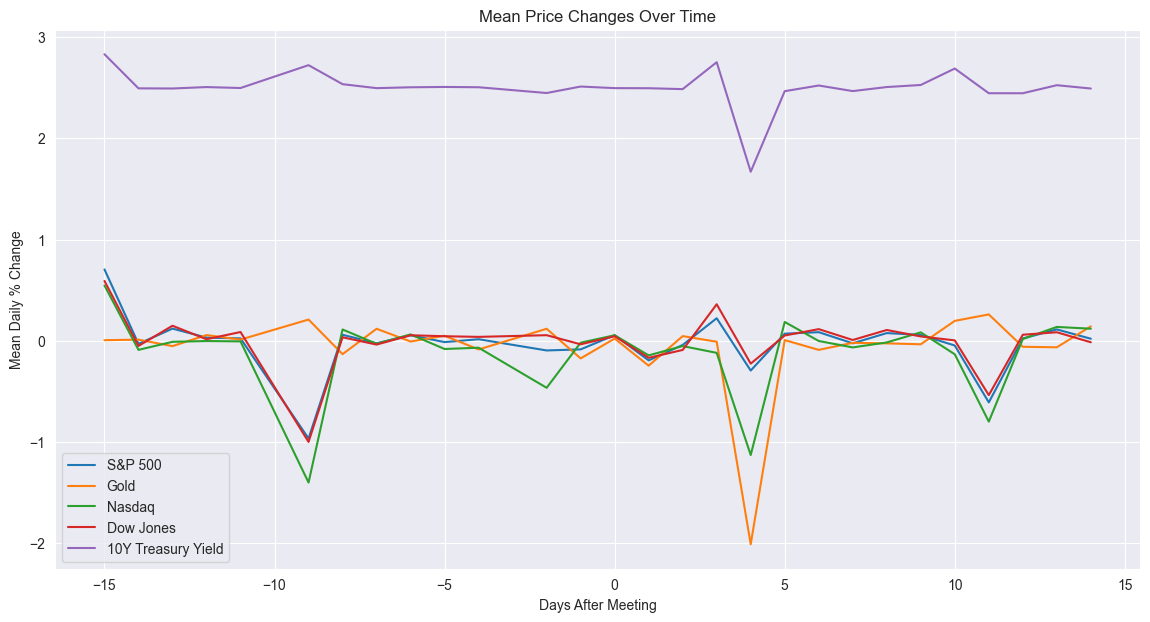

In [19]:
# Plotting the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_price_changes_by_day_df, x='Days After Meeting', y='SP500_Daily_%_Change', label='S&P 500')
sns.lineplot(data=mean_price_changes_by_day_df, x='Days After Meeting', y='Gold_Daily_%_Change', label='Gold')
sns.lineplot(data=mean_price_changes_by_day_df, x='Days After Meeting', y='Nasdaq_Daily_%_Change', label='Nasdaq')
sns.lineplot(data=mean_price_changes_by_day_df, x='Days After Meeting', y='DowJones_Daily_%_Change', label='Dow Jones')
sns.lineplot(data=mean_price_changes_by_day_df, x='Days After Meeting', y='10Y_Treasury_Yield', label='10Y Treasury Yield')

plt.title('Mean Price Changes Over Time')
plt.xlabel('Days After Meeting')
plt.ylabel('Mean Daily % Change')
plt.legend()
plt.show()

Observations

1. This chart displays the mean daily percentage change of S&P 500, Nasdaq, Dow Jones, Gold, and 10Y Treasury Yield before and after Federal Reserve meetings.
2. The 10Y Treasury Yield exhibits much larger fluctuations compared to other asset classes, indicating that the bond market is highly sensitive to Fed decisions.
3. Stock markets (S&P 500, Nasdaq, Dow Jones) experience notable price fluctuations before and after the meeting, suggesting uncertainty among investors before the announcement and subsequent adjustments afterward.
4. Gold and bonds follow a different pattern than equities, highlighting the distinct market reaction mechanisms.

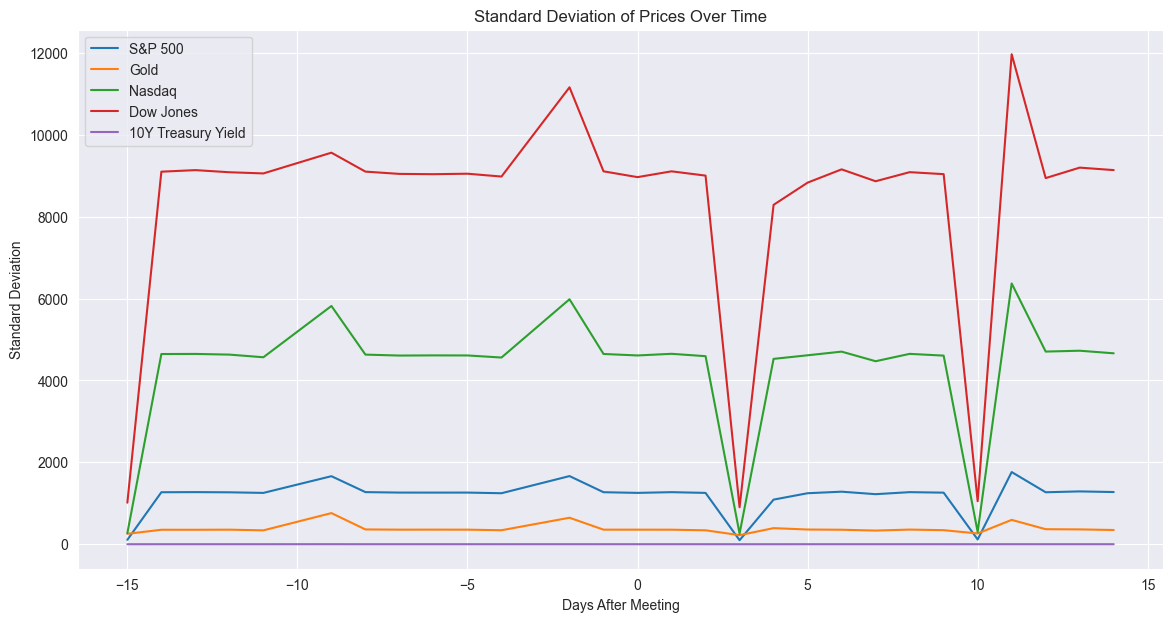

In [20]:
# Standard Deviation of Prices Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=std_price_by_day_df, x='Days After Meeting', y='SP500_Close', label='S&P 500')
sns.lineplot(data=std_price_by_day_df, x='Days After Meeting', y='Gold_Close', label='Gold')
sns.lineplot(data=std_price_by_day_df, x='Days After Meeting', y='Nasdaq_Close', label='Nasdaq')
sns.lineplot(data=std_price_by_day_df, x='Days After Meeting', y='DowJones_Close', label='Dow Jones')
sns.lineplot(data=std_price_by_day_df, x='Days After Meeting', y='10Y_Treasury_Yield', label='10Y Treasury Yield')

plt.title('Standard Deviation of Prices Over Time')
plt.xlabel('Days After Meeting')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()

Observations

1. This chart illustrates the standard deviation of different asset classes' prices before and after Federal Reserve meetings.
2. Stock market volatility (S&P 500, Nasdaq, Dow Jones) surges around the meeting period, reflecting heightened market uncertainty.
3. Bond market volatility (10Y Treasury Yield) is extremely high, especially near the meeting date, indicating its direct sensitivity to Fed policy decisions.
4. A sharp decline in volatility on the meeting day (Day 0) across all asset classes suggests that the market rapidly absorbs new information on the day of the announcement.

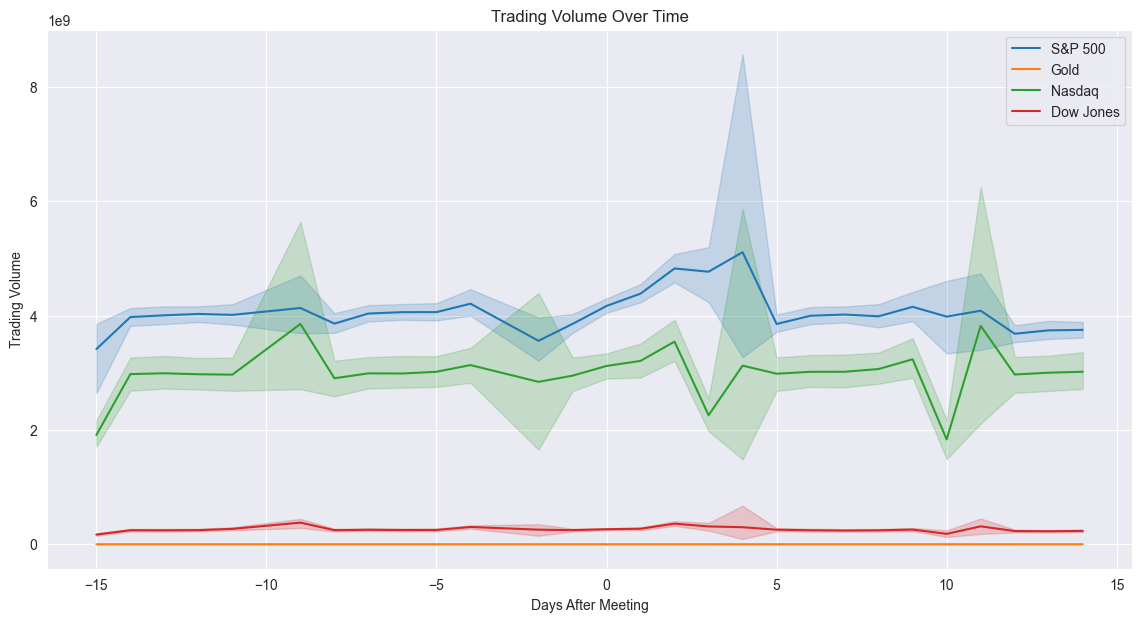

In [21]:
# Trading Volume Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=market_data_with_days_after_column_df, x='Days After Meeting', y='SP500_Volume', label='S&P 500')
sns.lineplot(data=market_data_with_days_after_column_df, x='Days After Meeting', y='Gold_Volume', label='Gold')
sns.lineplot(data=market_data_with_days_after_column_df, x='Days After Meeting', y='Nasdaq_Volume', label='Nasdaq')
sns.lineplot(data=market_data_with_days_after_column_df, x='Days After Meeting', y='DowJones_Volume', label='Dow Jones')

plt.title('Trading Volume Over Time')
plt.xlabel('Days After Meeting')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

Observations

1. This chart shows trading volumes for different asset classes (S&P 500, Nasdaq, Gold, Dow Jones) around Fed meetings.
2. Stock trading volume (S&P 500, Nasdaq) surges before and after the meeting, suggesting that investors adjust their positions in anticipation of policy changes and execute trades immediately after.
3. Gold trading volume remains relatively stable, consistent with its role as a safe-haven asset during periods of uncertainty.
4. The highest trading volumes occur on the meeting day and the days following it, demonstrating the market's rapid reaction to new policy announcements.

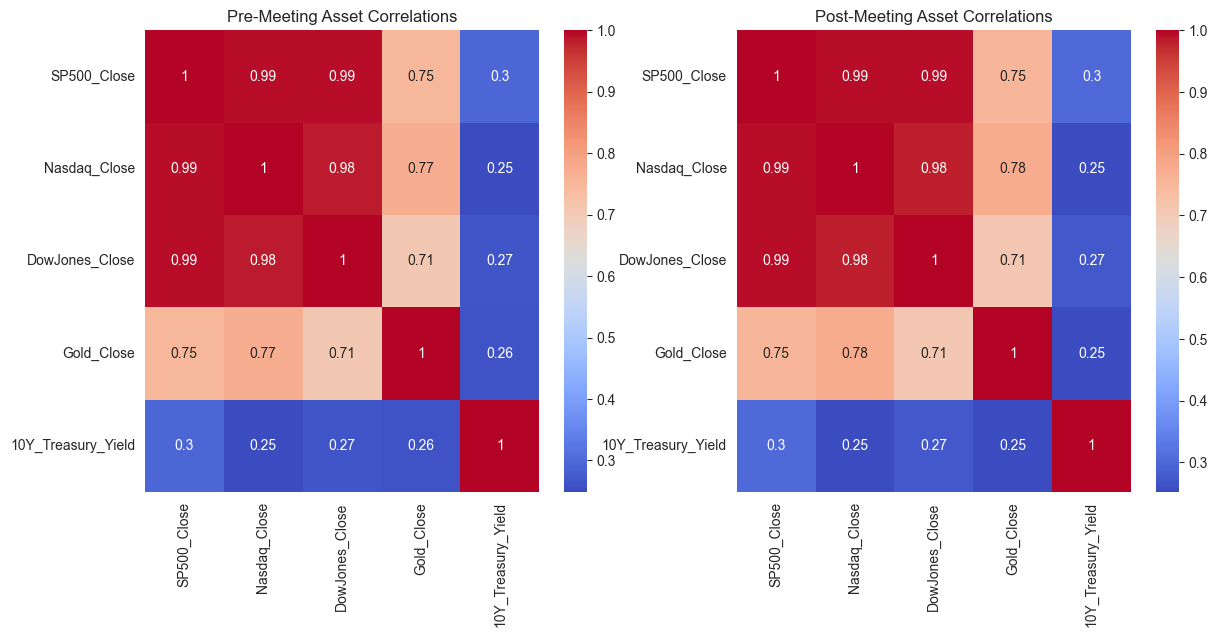

In [22]:

# Assuming `market_data_with_days_after_column_df` is the DataFrame you want to filter
market_data_filtered = market_data_with_days_after_column_df.copy()

# Adding a 'meeting_proximity' column for filtering purposes
market_data_filtered['meeting_proximity'] = market_data_filtered['Days After Meeting']

# Define the assets list
assets = ["SP500_Close", "Nasdaq_Close", "DowJones_Close", "Gold_Close", "10Y_Treasury_Yield"]

# Compute Correlation Matrix for Different Windows
pre_meeting = market_data_filtered[market_data_filtered["meeting_proximity"] < 0][assets].corr()
post_meeting = market_data_filtered[market_data_filtered["meeting_proximity"] > 0][assets].corr()

# Plot Heatmap of Asset Correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(pre_meeting, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Pre-Meeting Asset Correlations")

sns.heatmap(post_meeting, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Post-Meeting Asset Correlations")

plt.show()

Observations

This heatmap compares asset class correlations before and after Federal Reserve meetings.

Pre-Meeting (Left Panel):

    1. S&P 500, Nasdaq, and Dow Jones are highly correlated (>0.99), suggesting that stock markets behave similarly before the announcement.
    2. Gold has a lower correlation (0.75) with stocks, maintaining some of its safe-haven properties.
    3. Bonds (10Y Treasury Yield) have weaker correlations (0.3) with other assets, indicating a relatively independent movement.

Post-Meeting (Right Panel):

    1. Stock market correlations remain high, indicating that the broader market moves in sync.
    2. Gold's correlation with stocks slightly increases, implying that investors might adjust gold positions in line with broader market trends.
    3. Treasury yields remain largely uncorrelated with other assets, confirming that bond markets react differently to Fed policies.

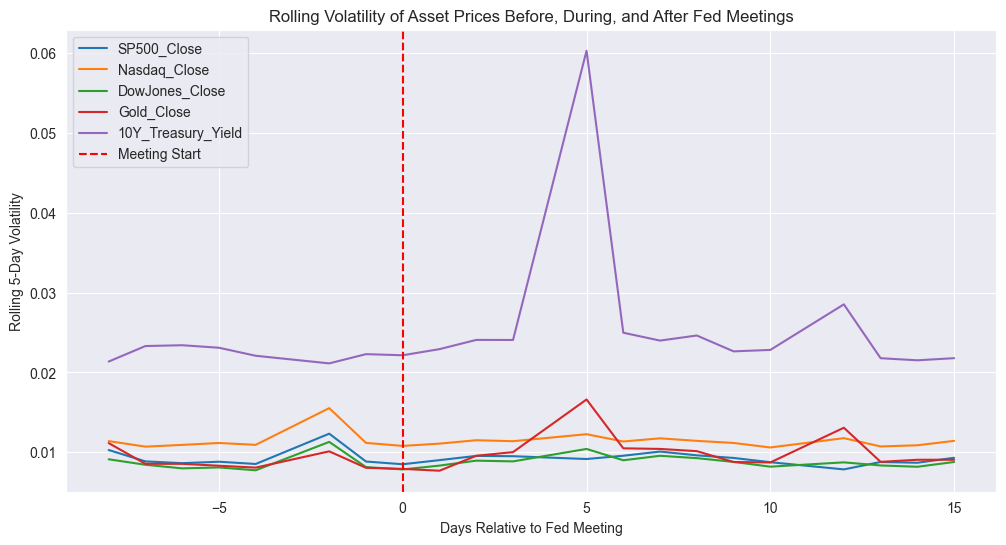

In [23]:
# Convert date columns to datetime format
market_data_df["Date"] = pd.to_datetime(market_data_df["Date"])
meetings_df["meeting_start"] = pd.to_datetime(meetings_df["meeting_start"])
meetings_df["meeting_end"] = pd.to_datetime(meetings_df["meeting_end"])

# Define relevant asset columns
assets = ["SP500_Close", "Nasdaq_Close", "DowJones_Close", "Gold_Close", "10Y_Treasury_Yield"]

# Calculate rolling volatility (standard deviation) over a 5-day window
rolling_volatility_data = []

for _, meeting in meetings_df.iterrows():
    start_window = meeting["meeting_start"] - pd.Timedelta(days=15)
    end_window = meeting["meeting_end"] + pd.Timedelta(days=15)

    window_data = market_data_df[(market_data_df["Date"] >= start_window) & (market_data_df["Date"] <= end_window)].copy()
    window_data["Days_Relative"] = (window_data["Date"] - meeting["meeting_start"]).dt.days

    if not window_data.empty:
        for asset in assets:
            window_data[asset] = window_data[asset].pct_change().rolling(window=5).std()  # 5-day rolling volatility
        rolling_volatility_data.append(window_data)

# Concatenate all meeting windows
volatility_data = pd.concat(rolling_volatility_data, ignore_index=True)

# Group by Days_Relative to compute mean rolling volatility for each day across meetings
volatility_chart_data = volatility_data.groupby("Days_Relative")[assets].mean()

# Plot Rolling Volatility Line Chart
plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(volatility_chart_data.index, volatility_chart_data[asset], label=asset)

plt.axvline(0, color="red", linestyle="--", label="Meeting Start")
plt.xlabel("Days Relative to Fed Meeting")
plt.ylabel("Rolling 5-Day Volatility")
plt.title("Rolling Volatility of Asset Prices Before, During, and After Fed Meetings")
plt.legend(loc="upper left")
plt.show()

In the 5 to 10 days leading up to the Federal Reserve meeting, market volatility shows an upward trend, indicating increased investor uncertainty. The volatility of the S&P 500, Nasdaq, and Dow Jones gradually rises before the meeting, reaching a peak 2 to 3 days prior. Gold remains relatively stable but experiences a noticeable spike in volatility on the meeting day, suggesting a demand for safe-haven assets amid policy uncertainty. The 10-year Treasury yield sees a slight increase in volatility before the meeting, but the changes are relatively moderate, reflecting a more measured response from the bond market. In the five days following the meeting, stock market volatility declines rapidly, while gold and Treasury volatility remain more stable, indicating that the market quickly digests the policy outcome. The sharp volatility peak on the meeting day highlights the immediate impact of the policy statement, while the subsequent decline suggests that market sentiment stabilizes post-announcement.
